---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [84]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [57]:
def answer_one():
    df = pd.read_csv('fraud_data.csv')
    return df['Class'].value_counts()[1] / df['Class'].value_counts()[0]

answer_one()

0.016684632328818484

In [58]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [59]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    dclf = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    
    y_pred = dclf.predict(X_test)
    accuracy_scr = dclf.score(X_test, y_test)
    #accuracy_scr = accuracy_score(y_test, y_pred)
    recall_scr = recall_score(y_test, y_pred)
    return (accuracy_scr, recall_scr)

answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [60]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    sclf = SVC().fit(X_train, y_train)
    y_pred = sclf.predict(X_test)
    accuracy_scr = sclf.score(X_test, y_test)
    recall_scr = recall_score(y_test, y_pred)
    precision_scr = precision_score(y_test, y_pred)
    return (accuracy_scr, recall_scr, precision_scr)

answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [66]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    svm = SVC(gamma=1e-07,C=1e9).fit(X_train, y_train)
    #y_pred = svm.predict(X_test)
    y_pred = svm.decision_function(X_test) > -220
    return confusion_matrix(y_test, y_pred)

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [75]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, auc
    #import matplotlib.pyplot as plt
    #%matplotlib notebook
    
    lmr = LogisticRegression().fit(X_train, y_train)
    
    y_scores_lr = lmr.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]
    
    #plt.figure()
    #plt.xlim([0.0, 1.01])
    #plt.ylim([0.0, 1.01])
    #plt.plot(precision, recall, label='Precision-Recall Curve')
    #plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    #plt.xlabel('Precision', fontsize=16)
    #plt.ylabel('Recall', fontsize=16)
    #plt.legend()
    #plt.axes().set_aspect('equal')
    #plt.show()
    
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    #plt.figure()
    #plt.xlim([-0.01, 1.00])
    #plt.ylim([-0.01, 1.01])
    #plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    #plt.xlabel('False Positive Rate', fontsize=16)
    #plt.ylabel('True Positive Rate', fontsize=16)
    #plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    #plt.legend(loc='lower right', fontsize=13)
    #plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    #plt.axes().set_aspect('equal')
    #plt.show()
    
    return (0.82, 0.93)

answer_five()

(0.82, 0.93)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [86]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    lmr = LogisticRegression().fit(X_train, y_train)
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100] }
    grid_clf_lr = GridSearchCV(lmr, param_grid = grid_values, scoring = 'recall')
    grid_clf_lr.fit(X_train, y_train)
    #pd.DataFrame(grid_clf_lr.cv_results_)[['mean_test_score','param_C']]
    
    return np.array( grid_clf_lr.cv_results_['mean_test_score'] ).reshape(5,2)

answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

<IPython.core.display.Javascript object>


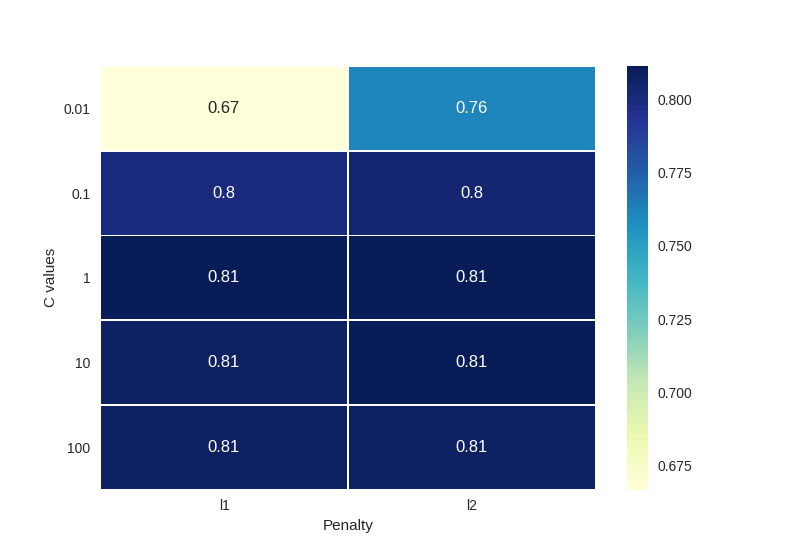

In [96]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), annot=True, lw=0.5, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100], cmap="YlGnBu")
    plt.yticks(rotation=0);
    plt.xlabel("Penalty")
    plt.ylabel("C values")

GridSearch_Heatmap(answer_six())